Run the PreProcessing notebooks before this notebook

# Load Oregon and Washington Pre processed Datasets

In [1]:
import fiona
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
oregon_landslides = gpd.read_file("../PreProcessing/ProcessedDataSets/oregon_landslides_processed.geojson")
print("Loaded GeoDataFrame shape:", oregon_landslides.shape)
oregon_landslides.head()

Loaded GeoDataFrame shape: (71318, 30)


,UNIQUE_ID,TYPE_MOVE,MATERIAL,MOVEMENT,MOVE_CODE,CONFIDENCE,AGE,DATE_MOVE,NAME,GEOL,...,MAP_UNIT_L,DESCRIPTION,YEAR,MONTH,DAY,DATE_RANGE,REACTIVATION,Shape_Length,Shape_Area,geometry
0,WASH_CO2,Flow,Debris,Flow,DFL,High,Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,...,None,Fan,NaN,None,None,None,None,447.239405,11291.764767,"MULTIPOLYGON (((699810 1325184.192, 699822.282..."
1,WASH_CO3,Flow,Debris,Flow,DFL,High,Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,...,None,Fan,NaN,None,None,None,None,455.775817,13701.014637,"MULTIPOLYGON (((699860.473 1325401.027, 699873..."
2,WASH_CO4,Flow,Debris,Flow,DFL,High,Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,...,None,Fan,NaN,None,None,None,None,568.959463,14879.315815,"MULTIPOLYGON (((700295.984 1325083.866, 700283..."
3,WASH_CO5,Flow,Debris,Flow,DFL,High,Historic (<150yrs),,,sed.Q.qsd.mf.nd.nd.fine,...,None,Fan,NaN,None,None,None,None,591.097110,20034.804942,"MULTIPOLYGON (((700696.889 1325351.537, 700659..."
4,WASH_CO6,Flow,Debris,Flow,DFL,High,Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,...,None,Fan,NaN,None,None,None,None,391.627031,8462.716893,"MULTIPOLYGON (((699242.636 1321687.547, 699279..."


In [5]:
washington_landslides = gpd.read_file("../PreProcessing/ProcessedDataSets/washington_landslides_processed.geojson")
print("Loaded GeoDataFrame shape:", washington_landslides.shape)
washington_landslides.head()

Loaded GeoDataFrame shape: (15060, 17)


,LANDSLIDE_ID,MATERIAL,MOVEMENT,MOVE_CODE,CONFIDENCE,RELATIVE_AGE,YEAR_MOVE,SLOPE_DEG,HS_HEIGHT_FT,FAIL_DEPTH_FT,MVMT_AZIMUTH_DEG,VOLUME_FT3,AVG_SCARP_DIST_FT,LS_NAME,Shape_Length,Shape_Area,geometry
0,18414,Earth or debris,Flow,EFL,Low (1-10),Pre-historic (>150 years),None,11,3.0,3.0,225.0,1322.894339,NaN,None,82.334854,440.966914,"MULTIPOLYGON (((1043516.638 614643.978, 104351..."
1,20629,Earth or debris,Complex,ES-R+EFL,Low (1-10),Pre-historic (>150 years),None,39,11.0,9.0,180.0,4039.516598,NaN,None,77.534531,441.695598,MULTIPOLYGON (EMPTY)
2,20630,Earth or debris,Complex,ES-R+EFL,Low (1-10),Pre-historic (>150 years),None,37,11.0,9.0,180.0,4563.138478,NaN,None,81.931760,483.669276,MULTIPOLYGON (EMPTY)
3,20661,Earth or debris,Topple,ET,Moderate (11-29),Pre-historic (>150 years),None,61,24.0,12.0,225.0,6320.755277,NaN,None,85.493104,509.669212,"MULTIPOLYGON (((1032543.812 660981.578, 103254..."
4,20594,Earth or debris,Topple,ET,Moderate (11-29),Pre-historic (>150 years),None,33,29.0,24.0,135.0,13016.550042,NaN,None,91.365031,528.125198,MULTIPOLYGON (EMPTY)


# Rename Columns to be more consistent

## Oregon

In [6]:
print(oregon_landslides.dtypes)

UNIQUE_ID         object
TYPE_MOVE         object
MATERIAL          object
MOVEMENT          object
MOVE_CODE         object
CONFIDENCE        object
AGE               object
DATE_MOVE         object
NAME              object
GEOL              object
SLOPE            float64
HS_HEIGHT        float64
FAN_HEIGHT       float64
FAIL_DEPTH       float64
DEEP_SHAL         object
HD_AVE           float64
DIRECT           float64
AREA             float64
VOL              float64
REF_ID_COD        object
MAP_UNIT_L        object
DESCRIPTION       object
YEAR             float64
MONTH             object
DAY               object
DATE_RANGE        object
REACTIVATION      object
Shape_Length     float64
Shape_Area       float64
geometry        geometry
dtype: object


We will rename 5 Columns in the Oregon Processed Dataset to make it more consistent with Washington. 

In [7]:
oregon_column_mapping = {
    'UNIQUE_ID': 'LANDSLIDE_ID',
    'AGE': 'RELATIVE_AGE',
    'SLOPE_DEG': 'SLOPE',
    'HD_AVE': 'AVG_SCARP_DIST_FT',
    'DIRECT': 'MVMT_AZIMUTH_DEG'
}


In [8]:
oregon_landslides.rename(columns=oregon_column_mapping, inplace=True)

In [9]:
oregon_landslides.dtypes

LANDSLIDE_ID           object
TYPE_MOVE              object
MATERIAL               object
MOVEMENT               object
MOVE_CODE              object
CONFIDENCE             object
RELATIVE_AGE           object
DATE_MOVE              object
NAME                   object
GEOL                   object
SLOPE                 float64
HS_HEIGHT             float64
FAN_HEIGHT            float64
FAIL_DEPTH            float64
DEEP_SHAL              object
AVG_SCARP_DIST_FT     float64
MVMT_AZIMUTH_DEG      float64
AREA                  float64
VOL                   float64
REF_ID_COD             object
MAP_UNIT_L             object
DESCRIPTION            object
YEAR                  float64
MONTH                  object
DAY                    object
DATE_RANGE             object
REACTIVATION           object
Shape_Length          float64
Shape_Area            float64
geometry             geometry
dtype: object

## Washington

In [10]:
print(washington_landslides.dtypes)

LANDSLIDE_ID            int32
MATERIAL               object
MOVEMENT               object
MOVE_CODE              object
CONFIDENCE             object
RELATIVE_AGE           object
YEAR_MOVE              object
SLOPE_DEG               int32
HS_HEIGHT_FT          float64
FAIL_DEPTH_FT         float64
MVMT_AZIMUTH_DEG      float64
VOLUME_FT3            float64
AVG_SCARP_DIST_FT     float64
LS_NAME                object
Shape_Length          float64
Shape_Area            float64
geometry             geometry
dtype: object


We will rename 6 Columns in the Oregon Processed Dataset to make it more consistent with Washington. 

In [11]:
washington_column_mapping = {
    'YEAR_MOVE': 'YEAR',
    'SLOPE_DEG': 'SLOPE',
    'HS_HEIGHT_FT': 'HS_HEIGHT',
    'FAIL_DEPTH_FT': 'FAIL_DEPTH',
    'VOLUME_FT3': 'VOLUME',
    'LS_NAME': 'NAME'
}

In [12]:
washington_landslides.rename(columns=washington_column_mapping, inplace=True)

In [13]:
washington_landslides.dtypes

LANDSLIDE_ID            int32
MATERIAL               object
MOVEMENT               object
MOVE_CODE              object
CONFIDENCE             object
RELATIVE_AGE           object
YEAR                   object
SLOPE                   int32
HS_HEIGHT             float64
FAIL_DEPTH            float64
MVMT_AZIMUTH_DEG      float64
VOLUME                float64
AVG_SCARP_DIST_FT     float64
NAME                   object
Shape_Length          float64
Shape_Area            float64
geometry             geometry
dtype: object

# Combine Loaded DataSets

In [14]:
print("Oregon Landslides CRS:", oregon_landslides.crs)
print("Washington Landslides CRS:", washington_landslides.crs)

Oregon Landslides CRS: EPSG:2994
Washington Landslides CRS: EPSG:2927


Due to the conflict in CRS of the Oregon and Washington Dataset, we choose a common CRS for the new combined dataset.

In [15]:
oregon_transformed = oregon_landslides.to_crs("EPSG:4326")
washington_transformed = washington_landslides.to_crs("EPSG:4326")

In [16]:
all_columns = list(set(oregon_transformed.columns).union(set(washington_transformed.columns)))
oregon_reindexed = oregon_transformed.reindex(columns=all_columns)
washington_reindexed = washington_transformed.reindex(columns=all_columns)
merged_landslides = pd.concat([oregon_reindexed, washington_reindexed], ignore_index=True)

In [17]:
merged_landslides.head()

,SLOPE,RELATIVE_AGE,YEAR,CONFIDENCE,MVMT_AZIMUTH_DEG,NAME,TYPE_MOVE,VOLUME,GEOL,MAP_UNIT_L,...,REF_ID_COD,LANDSLIDE_ID,DATE_RANGE,geometry,DATE_MOVE,DAY,HS_HEIGHT,REACTIVATION,VOL,FAN_HEIGHT
0,4.256579,Historic (<150yrs),NaN,High,0.0,,Flow,NaN,vol.M.cr.gr.nd.nd.bas,None,...,HairRW2021,WASH_CO2,None,"MULTIPOLYGON (((-122.88334 45.36111, -122.8832...",,None,0.0,None,11291.700,3.0
1,3.350513,Historic (<150yrs),NaN,High,180.0,,Flow,NaN,vol.M.cr.gr.nd.nd.bas,None,...,HairRW2021,WASH_CO3,None,"MULTIPOLYGON (((-122.88317 45.36171, -122.8831...",,None,0.0,None,13701.000,3.0
2,5.811321,Historic (<150yrs),NaN,High,337.5,,Flow,NaN,vol.M.cr.gr.nd.nd.bas,None,...,HairRW2021,WASH_CO4,None,"MULTIPOLYGON (((-122.88144 45.36087, -122.8814...",,None,0.0,None,19839.000,4.0
3,5.413578,Historic (<150yrs),NaN,High,315.0,,Flow,NaN,sed.Q.qsd.mf.nd.nd.fine,None,...,HairRW2021,WASH_CO5,None,"MULTIPOLYGON (((-122.87991 45.36164, -122.8800...",,None,0.0,None,53425.898,8.0
4,13.638928,Historic (<150yrs),NaN,High,270.0,,Flow,NaN,vol.M.cr.gr.nd.nd.bas,None,...,HairRW2021,WASH_CO6,None,"MULTIPOLYGON (((-122.88515 45.35148, -122.885 ...",,None,0.0,None,22567.199,8.0


# Save the Merged Dataset

In [18]:
merged_landslides.to_file("./or_wa_merged_landslides.geojson", driver="GeoJSON")

In [32]:
merged_landslides.to_csv("./or_wa_merged_landslides.csv", index=False)

# Inspect the Merged Dataset

In [19]:
print(merged_landslides.shape)

(86378, 31)


In [20]:
import pandas as pd

def completeness(df: pd.DataFrame):
    total = len(df)
    comp = df.count()               # non-null counts per column
    pct = (comp / total * 100).round(1)
    return pd.DataFrame({"non_null": comp, "% filled": pct})

df_completeness = completeness(merged_landslides)
print(df_completeness)
# print(completeness(deposits))


                   non_null  % filled
SLOPE                 75139      87.0
RELATIVE_AGE          57448      66.5
YEAR                    723       0.8
CONFIDENCE            57187      66.2
MVMT_AZIMUTH_DEG      73122      84.7
NAME                   4138       4.8
TYPE_MOVE             42383      49.1
VOLUME                15055      17.4
GEOL                  41432      48.0
MAP_UNIT_L            34199      39.6
MATERIAL              86378     100.0
MONTH                    81       0.1
FAIL_DEPTH            65544      75.9
DESCRIPTION           71318      82.6
Shape_Length          86378     100.0
DEEP_SHAL             29868      34.6
MOVEMENT              86378     100.0
AVG_SCARP_DIST_FT     48069      55.6
AREA                  61271      70.9
Shape_Area            86378     100.0
MOVE_CODE             57331      66.4
REF_ID_COD            71318      82.6
LANDSLIDE_ID          86378     100.0
DATE_RANGE              386       0.4
geometry              86378     100.0
DATE_MOVE   

In [21]:
df_completeness.sort_values(by="% filled", ascending=False, inplace=True)
print(df_completeness)

                   non_null  % filled
MOVEMENT              86378     100.0
geometry              86378     100.0
LANDSLIDE_ID          86378     100.0
MATERIAL              86378     100.0
Shape_Area            86378     100.0
Shape_Length          86378     100.0
SLOPE                 75139      87.0
MVMT_AZIMUTH_DEG      73122      84.7
REF_ID_COD            71318      82.6
DESCRIPTION           71318      82.6
FAIL_DEPTH            65544      75.9
HS_HEIGHT             65508      75.8
AREA                  61271      70.9
VOL                   58717      68.0
RELATIVE_AGE          57448      66.5
MOVE_CODE             57331      66.4
CONFIDENCE            57187      66.2
AVG_SCARP_DIST_FT     48069      55.6
FAN_HEIGHT            44436      51.4
TYPE_MOVE             42383      49.1
GEOL                  41432      48.0
MAP_UNIT_L            34199      39.6
DEEP_SHAL             29868      34.6
VOLUME                15055      17.4
NAME                   4138       4.8
DATE_MOVE   

In [22]:
print("Value Counts for MOVEMENT:")
print(merged_landslides['MOVEMENT'].value_counts())

Value Counts for MOVEMENT:
MOVEMENT
<NA>                                28961
Flow                                24100
Complex                             14096
Slide-Rotational                     9720
Slide-Translational                  6612
Complex+Slide-Rotational+Flow        1404
Fall                                  758
Slide-Rotational+Flow                 288
Complex+Slide-Translational+Flow      224
Slide-Translational+Flow               77
Avalanche                              49
Topple                                 37
Complex+Slide+Flow                     19
Slide-Translational+Fall               16
Spread                                 12
Slide-Rotational+Spread                 1
Slide+Fall                              1
Slide-Translational+Flow+Fall           1
Slide-Rotational+Fall                   1
Complex+Flow                            1
Name: count, dtype: int64


In [23]:
print("Value counts for 'MATERIAL':")
print(merged_landslides['MATERIAL'].value_counts())

Value counts for 'MATERIAL':
MATERIAL
<NA>               28961
Debris             14719
Earth or debris    14712
Rock               11744
Earth               9105
Complex             6007
Earth+Rock          1110
Debris+Rock           17
Debris+Earth           2
Other                  1
Name: count, dtype: int64


In [24]:
print("Value counts for 'RELATIVE_AGE' in Oregon Landslides:")
print(merged_landslides['RELATIVE_AGE'].value_counts())

Value counts for 'RELATIVE_AGE' in Oregon Landslides:
RELATIVE_AGE
Pre-Historic (>150yrs)       27070
Historic (<150yrs)           15237
Pre-historic (>150 years)    13892
Historic (</=150 years)       1168
Historic (<150 years)           81
Name: count, dtype: int64


In [25]:
# Create a mapping dictionary to standardize the values
age_mapping = {
    'Pre-Historic (>150yrs)': 'Pre-Historic (>150 years)',
    'Pre-historic (>150 years)': 'Pre-Historic (>150 years)',
    'Historic (<150yrs)': 'Historic (<150 years)',
    'Historic (</=150 years)': 'Historic (<150 years)',
    'Historic (<150 years)': 'Historic (<150 years)'
}

merged_landslides['RELATIVE_AGE'] = merged_landslides['RELATIVE_AGE'].replace(age_mapping)

print("\nValue counts after standardization:")
print(merged_landslides['RELATIVE_AGE'].value_counts())


Value counts after standardization:
RELATIVE_AGE
Pre-Historic (>150 years)    40962
Historic (<150 years)        16486
Name: count, dtype: int64


# Plot the Combined Dataset

<Axes: >

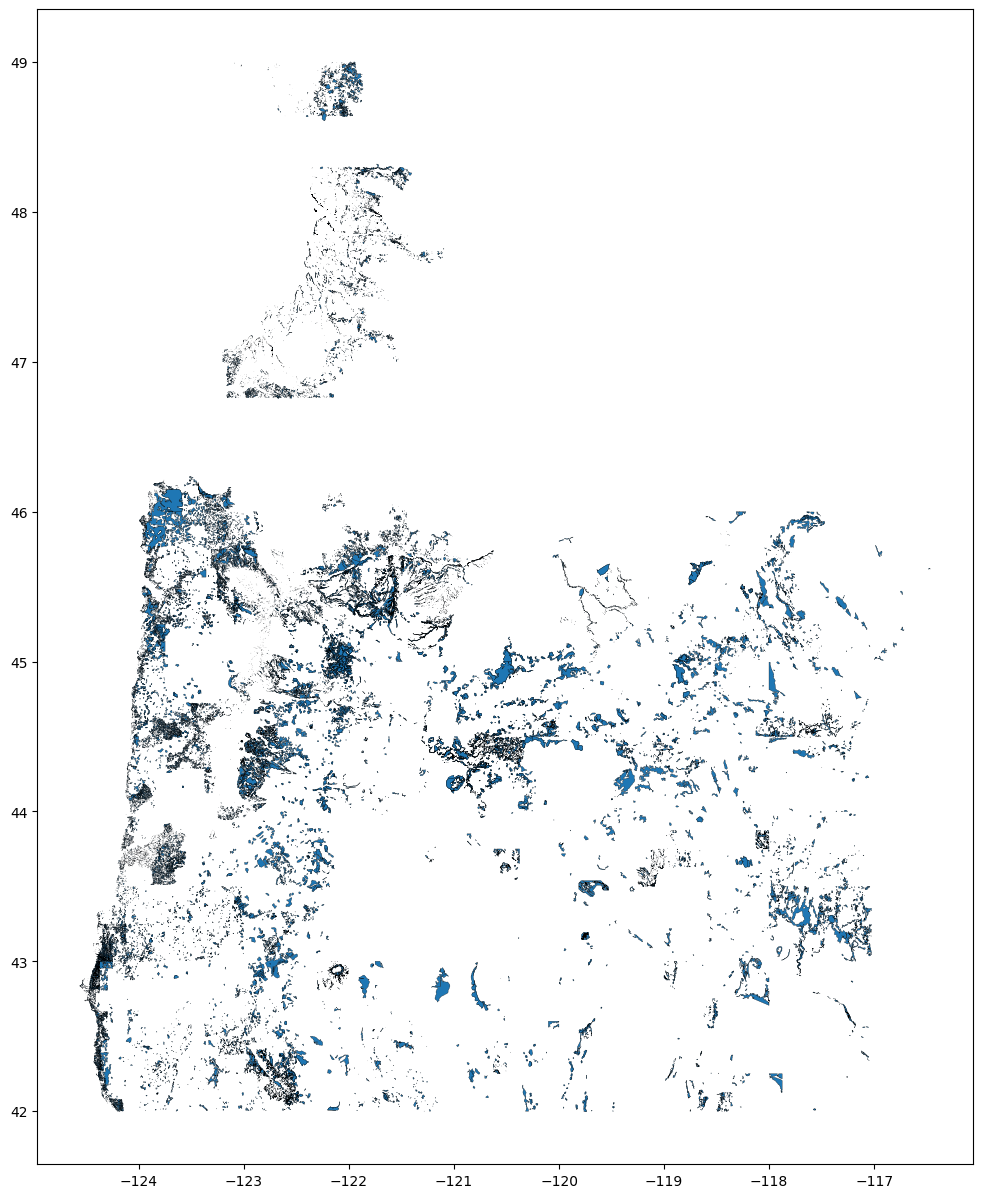

In [26]:
merged_landslides.plot(figsize=(15, 15), edgecolor="k", linewidth=0.2)

In [51]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 33.0 MB/s eta 0:00:00a 0:00:01


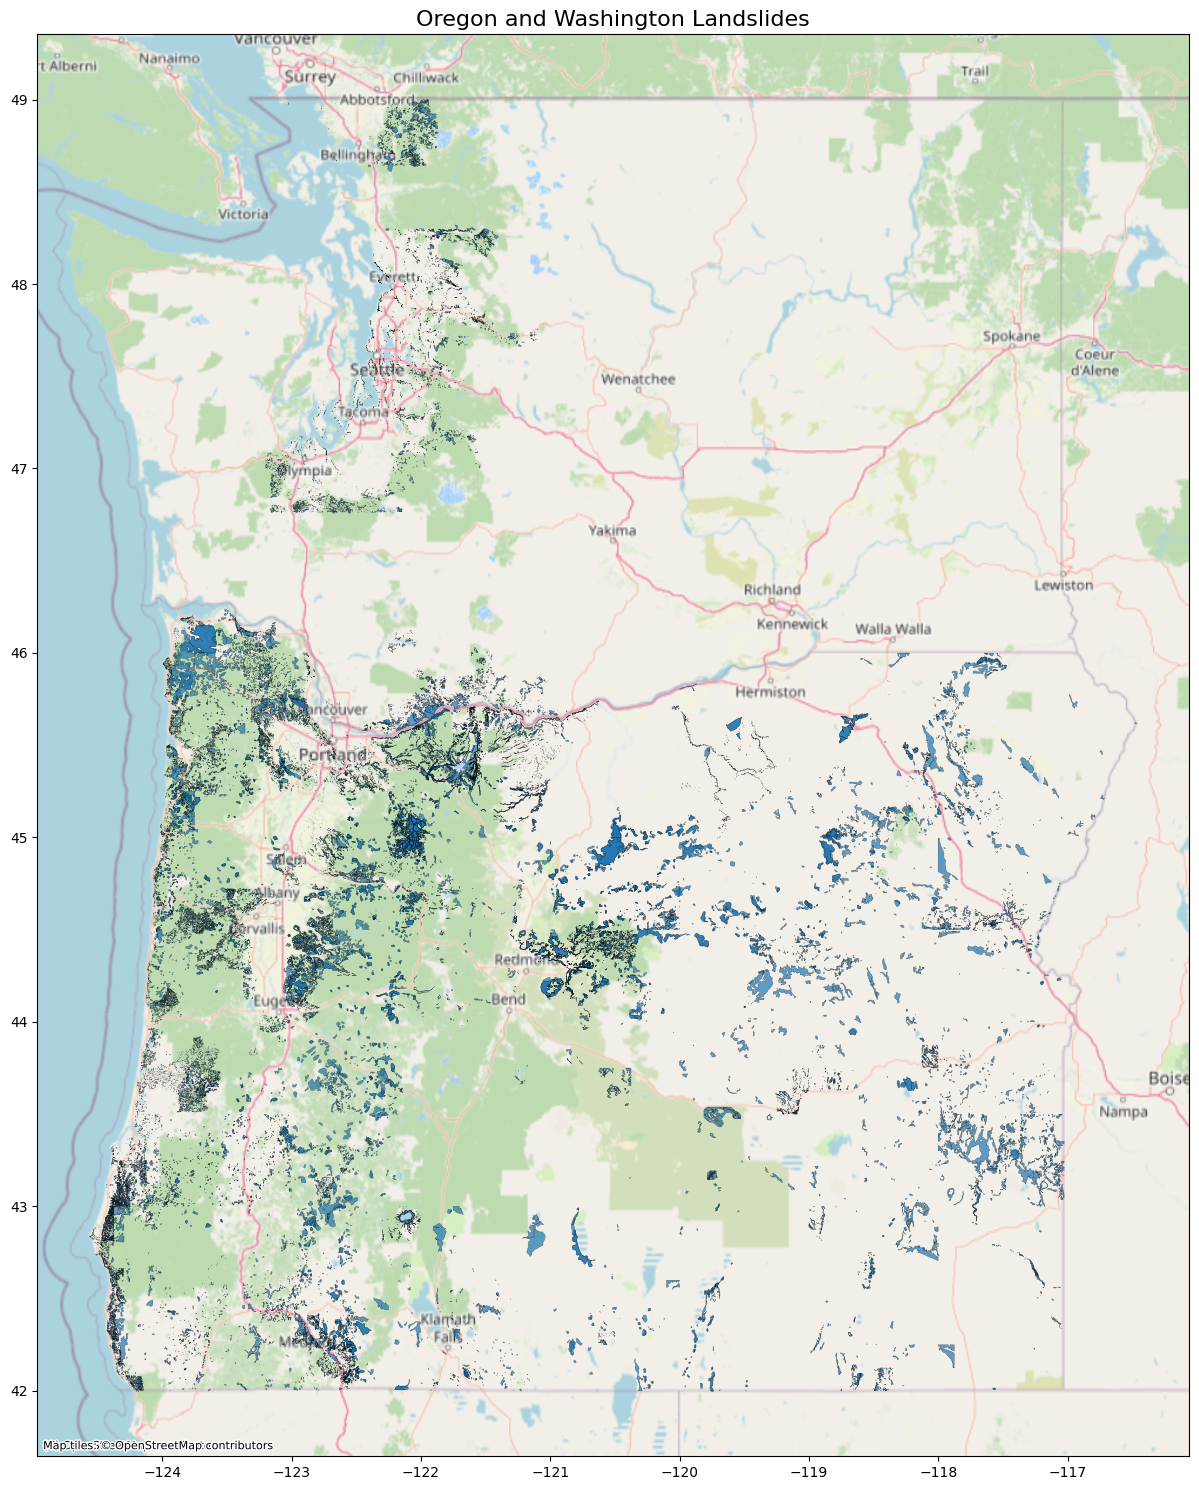

In [27]:
import contextily as ctx

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the landslides
merged_landslides.plot(ax=ax, edgecolor="k", linewidth=0.2, alpha=0.7)

# Add a basemap
ctx.add_basemap(ax, crs=merged_landslides.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add a title
plt.title('Oregon and Washington Landslides', fontsize=16)

# Add a scale bar
ctx.add_attribution(ax, "Map tiles: © OpenStreetMap contributors")

plt.tight_layout()
plt.show()